In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

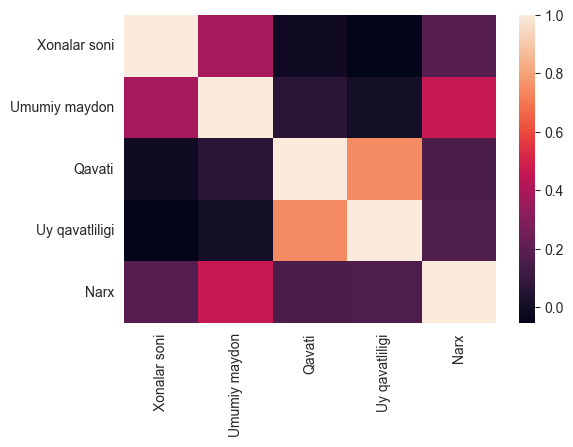

In [2]:
df = pd.read_csv('housing_data.csv')
corr = df.corr(numeric_only=True)


plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=False)

In [3]:
cols = ['Umumiy maydon', 'Xonalar soni', 'Mebelli', 'Turarjoy turi', 'Narx']

df = df[cols]
df.replace({'Ha':1, 'Yoʻq':0, 'Ikkilamchi bozor':0, 'Yangi qurilgan uylar':1}, inplace=True)
df = df[(df['Xonalar soni'] <= 5) & (df['Umumiy maydon'] < 210)& (df['Narx']<220)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15732\284798268.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Ha':1, 'Yoʻq':0, 'Ikkilamchi bozor':0, 'Yangi qurilgan uylar':1}, inplace=True)


In [4]:
df

,Umumiy maydon,Xonalar soni,Mebelli,Turarjoy turi,Narx
0,95.0,4,1,0,165
1,76.0,3,1,1,185
2,74.0,3,1,1,184
3,52.0,2,0,1,56
4,70.0,2,0,1,170
...,...,...,...,...,...
1172,40.0,2,1,0,69
1173,45.0,3,1,0,55
1174,46.0,2,1,0,80
1175,28.0,1,0,1,19


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
target = df['Narx']
data = df.drop('Narx', axis=1)
X_temp, X_test, y_temp , y_test = train_test_split(data, target,  test_size=0.15, random_state=42)
X_train, X_val , y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [7]:
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# regressor = LinearRegression()
#
# regressor.fit(X_train_scaled, y_train)
# y_val_pred = regressor.predict(X_val_scaled)
# mean_squared_error(y_val, y_val_pred)
# from sklearn.metrics import mean_absolute_error
#
# mae = mean_absolute_error(y_val, y_val_pred)
# r2_score(y_val, y_val_pred)

In [18]:
from sklearn.svm import SVR

svm2 = SVR(kernel="poly", degree=1, coef0=1, epsilon=0.1)
svm2.fit(X_train_scaled, y_train)
svm2.fit(X_train_scaled, y_train)
y_val_pred = svm2.predict(X_val_scaled)
r2_score(y_val, y_val_pred)

0.3434355490197789

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=20,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)  # trees don’t need scaling
y_val_pred = rf.predict(X_val)
print("R2 (RF):", r2_score(y_val, y_val_pred))


R2 (RF): 0.3750616296246355


In [31]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('housing_data.csv')
# Select features
features = ['Turarjoy turi', 'Xonalar soni', 'Umumiy maydon', 'Qavati',
            'Uy qavatliligi', 'Mebelli', 'Tuman']

target = 'Narx'

X = df[features]
y = df[target]

# Train/Val/Test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Identify categorical feature indexes
cat_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object']).columns]

model = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=200
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val)
)

y_pred = model.predict(X_val)
print("R²:", r2_score(y_val, y_pred))


0:	learn: 80.7173833	test: 95.9658286	best: 95.9658286 (0)	total: 163ms	remaining: 4m 4s
200:	learn: 46.8167002	test: 84.4380423	best: 84.0914679 (163)	total: 4.13s	remaining: 26.7s
400:	learn: 34.4218665	test: 86.3261659	best: 84.0914679 (163)	total: 8.17s	remaining: 22.4s
600:	learn: 27.6895792	test: 87.5639062	best: 84.0914679 (163)	total: 12.2s	remaining: 18.3s
800:	learn: 22.9372707	test: 88.6180599	best: 84.0914679 (163)	total: 16.2s	remaining: 14.1s
1000:	learn: 19.7073014	test: 89.0725531	best: 84.0914679 (163)	total: 20.2s	remaining: 10.1s
1200:	learn: 17.0231834	test: 89.4244170	best: 84.0914679 (163)	total: 24.5s	remaining: 6.11s
1400:	learn: 15.0780623	test: 89.7839428	best: 84.0914679 (163)	total: 28.7s	remaining: 2.03s
1499:	learn: 13.9901272	test: 89.9604141	best: 84.0914679 (163)	total: 30.7s	remaining: 0us

bestTest = 84.09146787
bestIteration = 163

Shrink model to first 164 iterations.
R²: 0.24210474197851473
